<a href="https://colab.research.google.com/github/AlexxxisDxlgxdx/M-todos-numericos/blob/main/Ejercicio_2(M%C3%A9todos_num%C3%A9ricos_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio 2
Fenómeno Runge

In [137]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

def lagrange(x, y):
    n = len(x)
    # Calculamos los polinomios base
    L = []
    itr = Polynomial(0)
    for i in range(n):
        base = Polynomial([1])
        for j in range(n):
            if j != i:
                factor = Polynomial([-x[j], 1])/(x[i]-x[j])
                base = base * factor
        L.append(base)
        itr += y[i] * base
    return itr, L

def newton(x, y):
    n = len(x)
    N = np.zeros((n, n))
    # Completamos la tabla de diferencias divididas
    N[0,:] = y
    for i in range(1,n):
        for j in range(n-i):
            top = N[i-1,j] - N[i-1,j+1]
            bottom = x[j] - x[j+i]
            N[i,j] = top/bottom

    # Calculamos los polinomios base
    itr = Polynomial(0)
    for i in range(n):
        base = Polynomial([1])
        for j in range(i):
            factor = Polynomial([-x[j], 1])
            base = base * factor
        itr += N[i,0] * base
    return itr, N


In [136]:
import numpy as np
import sympy as sp
import math

# f_sym: Es una función simbólica de variable 'x' que representa la función a aproximar
# nodes: Lista que contiene los nodos de la interpolación
# xs: Lista de puntos donde evaluar el error
# error_bound: Lista de las cotas de error
def general_error_bound(f_sym, nodes, xs):
    n = len(nodes)
    a = min(nodes)
    b = max(nodes)
    x_sym = sp.symbols('x')

    # Calculamos la n derivada de la función
    nth_derivative = sp.diff(f_sym, x_sym, n)

    # Calculamos las cota de error
    M = sp.maximum(nth_derivative, x_sym, sp.Interval(a, b)).evalf()
    error_bound = []
    for elem in xs:
        P = 1
        for i in range(n):
            P *= abs(elem - nodes[i])
        error_bound.append(P*M/math.factorial(n))
    return error_bound

# f_sym: Es una función simbólica de variable 'x' que representa la función a aproximar
# n: Es el número de nodos que se van a utilizar en la interpolación
# a, b: Intervalo de la interpolación
# error_bound: La cota del error para una interpolación con nodos igualmente espaciados
def evenly_error_bound(f_sym, n, a, b):
    x_sym = sp.symbols('x')

    # Calculamos la n derivada de la función
    nth_derivative = sp.diff(f_sym, x_sym, n)

    # Calculamos la cota de error
    M = sp.maximum(nth_derivative, x_sym, sp.Interval(a, b)).evalf()
    h = (b-a)/(n-1)
    error_bound = h**n*M/(4*n)

    return error_bound


#Datos

In [132]:
#Definiendo funcion
def runge_function(x):
    return 1 / (1 + x**2)


##a) Obtén elpolinomio interpolador de grado 4 que aproxima a la función de Runge tomando nodos equiespaciados en el intervalo [-5,5]

In [120]:
#Calculamos nodos equiespaciados en el intervalo[5,5]
x_nodos = np.linspace(-5, 5, 5)
y_nodos = runge_function(x_nodos)

In [121]:
# Calculamos el polinomio de interpolación
p, L = lagrange(x_nodos, y_nodos)

# Imprimimos el polinomio interpolador
print(f"Polinomio interpolador: P(x) = {p}")

Polinomio interpolador: P(x) = 1.0 + (5.7896396e-17)·x - 0.17108753·x² - (4.06575815e-19)·x³ +
0.00530504·x⁴


In [138]:
#Calculamos cota de error para una interpolación con nodos igualmente espaciados
x = sp.symbols('x')
f_sym = 1 / (1 + x**2)
evenly_error_bound(f_sym, 5, -5, 5)

490.522377612445

###Graficando polinomio interpolador, función y su error

In [118]:
def plot_interpolation(f, x_nodos):
    # Evaluamos los nodos
    y_nodos = f(x_nodos)

    # Calculamos el polinomio interpolador
    p, _ = lagrange(x_nodos, y_nodos)

    # Valores para graficar
    x_vals = np.linspace(-7, 7, 500)  # Valores de x para la gráfica
    y_vals = f(x_vals)  # Valores de la función original
    p_vals = p(x_vals)  # Valores del polinomio interpolador

    # Graficamos la función original
    plt.plot(x_vals, y_vals, label='Función original: $f(x) = \\frac{1}{1+x^2}$', color='blue')

    # Graficamos el polinomio interpolador
    plt.plot(x_vals, p_vals, label='Polinomio Interpolador', color='red', linestyle='--')

    # Graficamos los nodos
    plt.scatter(x_nodos, y_nodos, color='green', marker='o', label='Nodos de Interpolación')

    # Generamos gráfica
    plt.title('Interpolación de Lagrange')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.axhline(0, color='black', linewidth=0.5, ls='--')
    plt.axvline(0, color='black', linewidth=0.5, ls='--')
    plt.grid()
    plt.legend()
    plt.show()

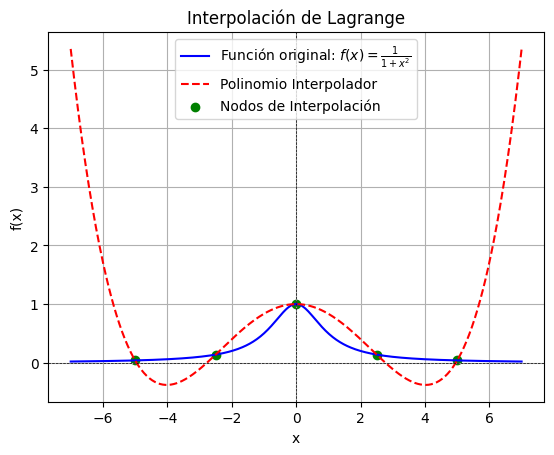

In [117]:
#Graficando
plot_interpolation(runge_function, x_nodos)

In [139]:
def plot_error_bounds(f_sym, n, a, b):
    x_vals = np.linspace(a, b, 500)
    error_bounds = []

    for x_eval in x_vals:
        error_bound = evenly_error_bound(f_sym, n, a, x_eval)
        error_bounds.append(error_bound)

    plt.plot(x_vals, error_bounds, label="Cota del Error")
    plt.xlabel('x')
    plt.ylabel('Cota del Error')
    plt.title(f'Cota del Error en función de x para n = {n}')
    plt.grid(True)
    plt.legend()
    plt.show()


In [ ]:
plot_error_bounds(f_sym, 5, -5, 5)



##b) Comprueba que al aumentar el grado del polinomio en vez de mejorar empeora.



###Comprobando con polinomio de grado 5




In [74]:
#Calculamos nodos equiespaciados en el intervalo[5,5]  pero con polinomio de grado 5
x_nodos = np.linspace(-5, 5, 6)
y_nodos = runge_function(x_nodos)

In [75]:
# Calculamos el polinomio de interpolación
p, L = lagrange(x_nodos, y_nodos)

# Imprimimos el polinomio interpolador
print(f"Polinomio interpolador: P(x) = {p}")

Polinomio interpolador: P(x) = 0.56730769 + (1.76182853e-17)·x - 0.06923077·x² - (1.60055346e-17)·x³ +
0.00192308·x⁴ + (8.47032947e-21)·x⁵


In [76]:
#Calculamos cota de error para una interpolación con nodos igualmente espaciados de polinomio de grado 5
x = sp.symbols('x')
f_sym = 1 / (1 + x**2)
evenly_error_bound(f_sym, 5, -5, 6)

789.991194368619

###Comprobando con polinomio de grado 6





In [79]:
#Calculamos nodos equiespaciados en el intervalo[5,5]  pero con polinomio de grado 6
x_nodos = np.linspace(-5, 5, 7)
y_nodos = runge_function(x_nodos)

In [80]:
# Calculamos el polinomio de interpolación
p, L = lagrange(x_nodos, y_nodos)

# Imprimimos el polinomio interpolador
print(f"Polinomio interpolador: P(x) = {p}")

Polinomio interpolador: P(x) = 1.0 + (1.33411077e-16)·x - 0.35136369·x² - (1.67509236e-17)·x³ +
0.0335319·x⁴ + (1.81942677e-18)·x⁵ - 0.00084063·x⁶


In [81]:
#Calculamos cota de  error para una interpolación con nodos igualmente espaciados de polinomio de grado 6
x = sp.symbols('x')
f_sym = 1 / (1 + x**2)
evenly_error_bound(f_sym, 5, -5, 7)

1220.57664266060

###Comprobando con polinomio de grado 8

In [82]:
#Calculamos nodos equiespaciados en el intervalo[5,5]  pero con polinomio de grado 8
x_nodos = np.linspace(-5, 5, 9)
y_nodos = runge_function(x_nodos)

In [83]:
# Calculamos el polinomio de interpolación
p, L = lagrange(x_nodos, y_nodos)

# Imprimimos el polinomio interpolador
print(f"Polinomio interpolador: P(x) = {p}")

Polinomio interpolador: P(x) = 1.0 - (4.98732999e-18)·x - 0.52812138·x² + (1.01589744e-16)·x³ +
0.09818753·x⁴ + (2.6762853e-17)·x⁵ - 0.00658016·x⁶ + (1.2006692e-19)·x⁷ +
0.00013744·x⁸


In [84]:
#Calculamos cota de  error para una interpolación con nodos igualmente espaciados de polinomio de grado 8
x = sp.symbols('x')
f_sym = 1 / (1 + x**2)
evenly_error_bound(f_sym, 5, -5, 9)

2638.14707217036

###Comprobando con polinomio de grado 10

In [85]:
#Calculamos nodos equiespaciados en el intervalo[5,5]  pero con polinomio de grado 10
x_nodos = np.linspace(-5, 5, 11)
y_nodos = runge_function(x_nodos)

In [86]:
# Calculamos el polinomio de interpolación
p, L = lagrange(x_nodos, y_nodos)

# Imprimimos el polinomio interpolador
print(f"Polinomio interpolador: P(x) = {p}")

Polinomio interpolador: P(x) = 1.0 - (1.47668336e-16)·x - 0.67420814·x² - (1.71622428e-16)·x³ +
0.19737557·x⁴ + (1.00053226e-16)·x⁵ - 0.02441176·x⁶ + (7.9773563e-18)·x⁷ +
0.00126697·x⁸ - (9.49603343e-21)·x⁹ - (2.26244344e-05)·x¹⁰


In [87]:
#Calculamos cota de  error para una interpolación con nodos igualmente espaciados de polinomio de grado 10
x = sp.symbols('x')
f_sym = 1 / (1 + x**2)
evenly_error_bound(f_sym, 5, -5, 11)

5143.49992627347

#Conclusión


